In [640]:
# Import Data analysis and Preprocessing
import numpy as np
import pandas as pd
import random as rnd

# Import Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz

# Import DT and RF Machine Learning Models
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
from sklearn.metrics import make_scorer, precision_score
from sklearn.metrics import accuracy_score

In [460]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
combine = [train_df, test_df]

In [461]:
train_df.shape

(891, 12)

In [462]:
test_df.shape

(418, 11)

In [463]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [464]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [465]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [466]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [467]:
# Check the Null values on train_df
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [468]:
# Check the Null values on test_df
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [469]:
# Data Visualization for analyze
def bar_chart_analyze(feature):
    # count of surviver from each column
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    
    # count of dead person from each column
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    
    # count of survivors, and combine dead people to the one dataframe
    df = pd.DataFrame([survived, dead])
    
    # define index from the dataframe
    df.index = ['Survived', 'Dead']
    
    # show the plot for analyzing
    df.plot(kind='bar', stacked=True, figsize=(9,4))

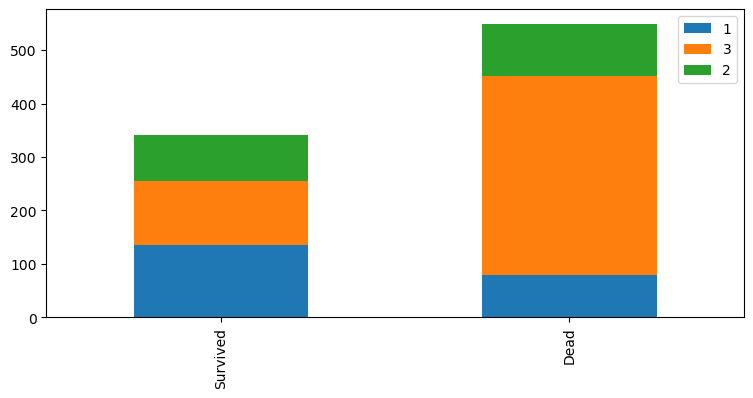

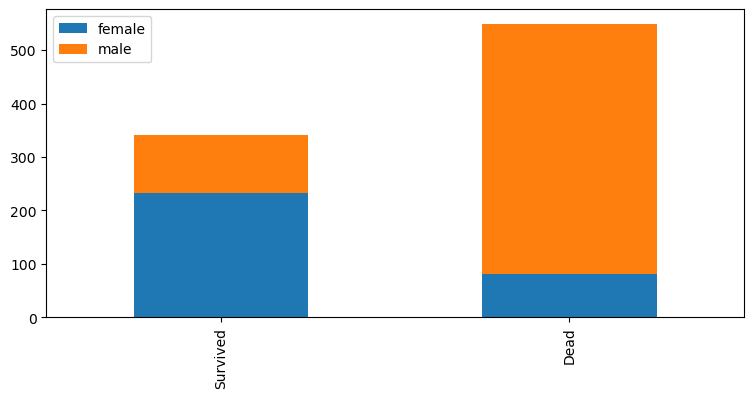

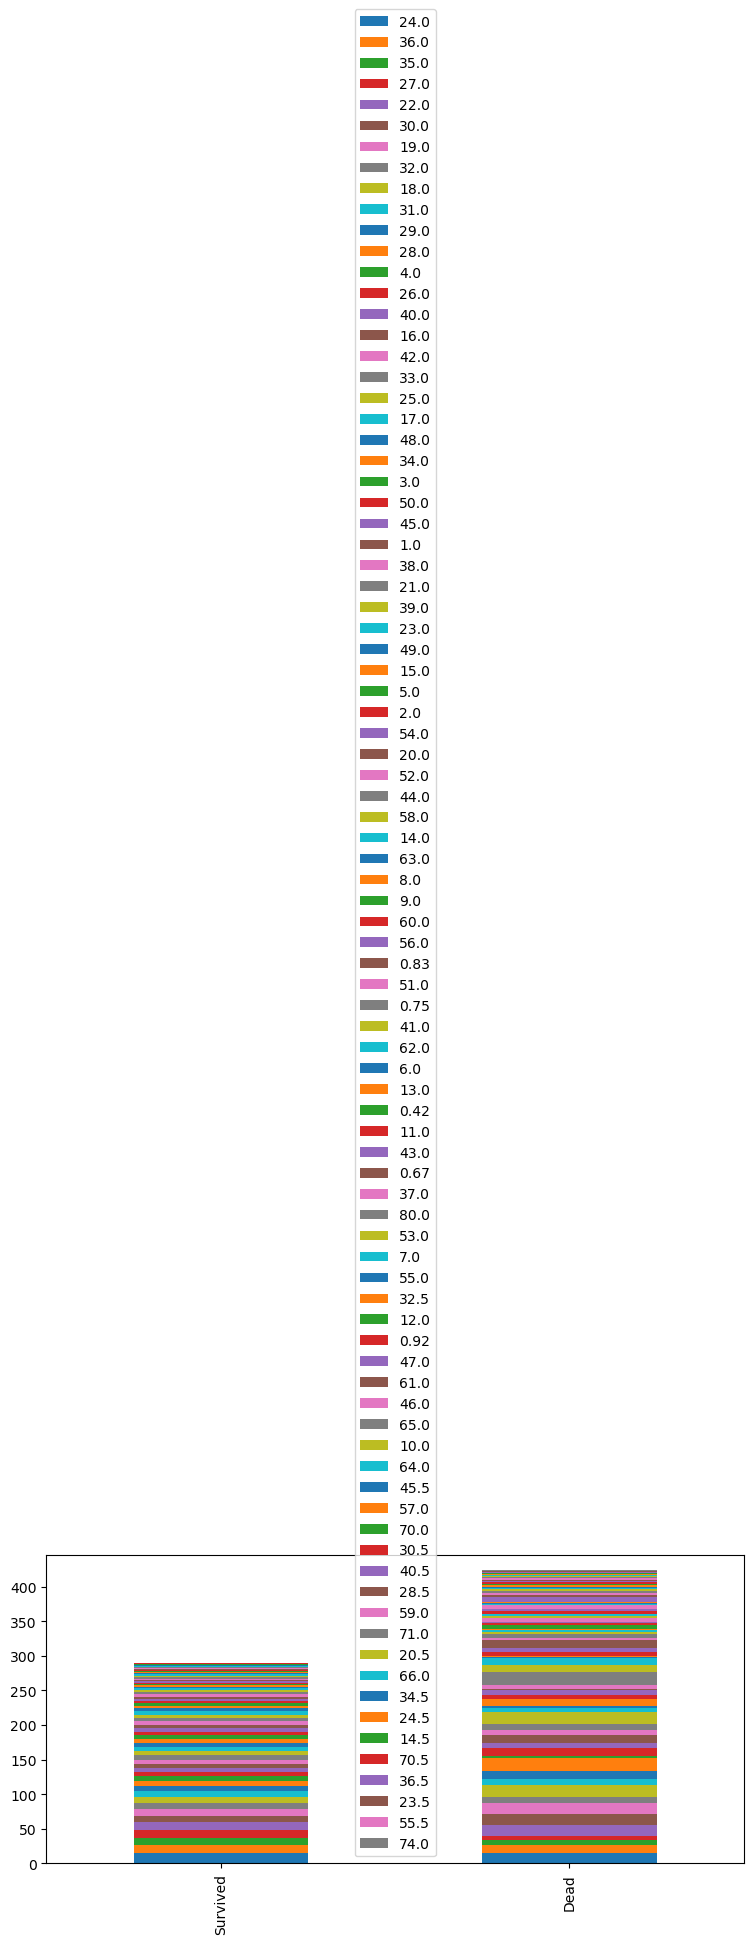

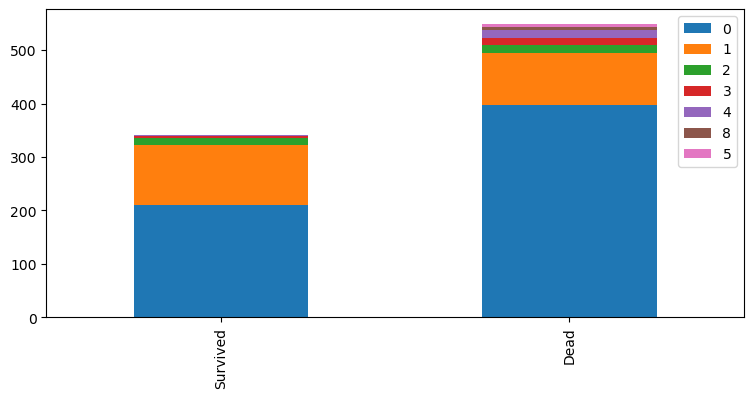

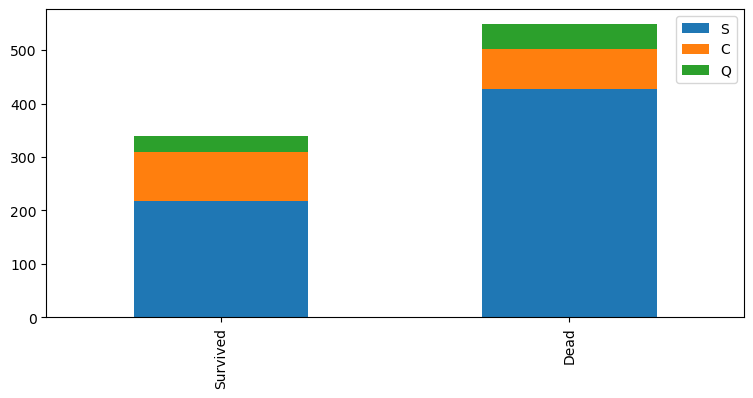

In [470]:
# Check the bar_chart_analyze
bar_chart_analyze('Pclass')
bar_chart_analyze('Sex')
bar_chart_analyze('Age')
bar_chart_analyze('SibSp')
bar_chart_analyze('Embarked')

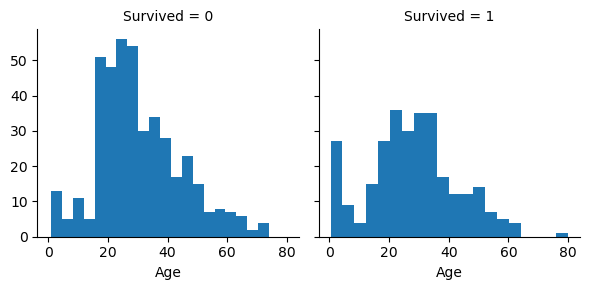

In [471]:
# Check the Grid_chart_analyze
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\nkkwo\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


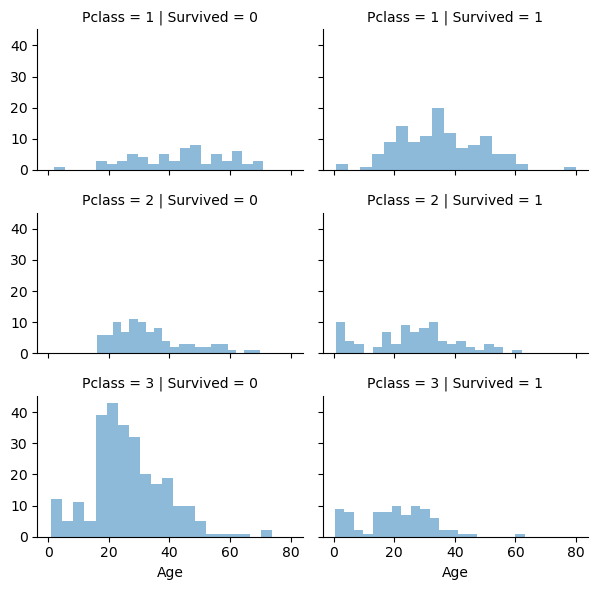

In [472]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [473]:
# Preprocessing Data start
# 'Sex' feature preprocessing

sex_mapping = {"male":0, "female":1}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [474]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [475]:
# 'SibSP & Parch' feature preprocessing
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    
    dataset.loc[dataset['FamilySize'] > 1, 'IsAlone'] = 0

In [476]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,1


<AxesSubplot:>

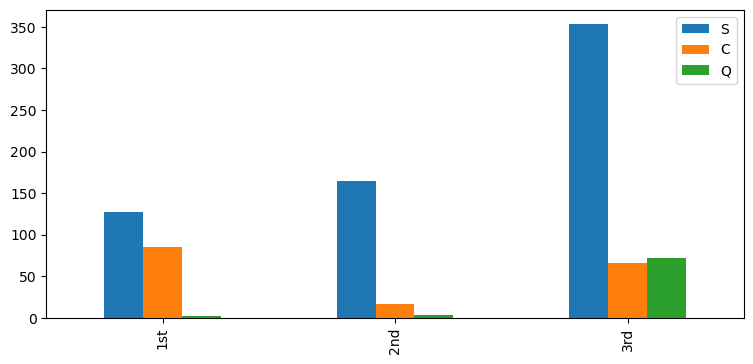

In [477]:
# 'Embarked' feature preprocessing
# Visualization Analyze
class_list=[]
for i in range(1,4):
    series = train_df[train_df['Pclass'] == i]['Embarked'].value_counts()
    class_list.append(series)

df = pd.DataFrame(class_list)
df.index = ['1st', '2nd', '3rd']
df.plot(kind="bar", figsize=(9,4))

In [478]:
# most of passnegers get-in from the S embark, so fill thed Null data to the 'S'
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [479]:
# Mapping the number to the embarked alphabet
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [480]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1


In [481]:
# Extract Title from Name Column
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract('([\w]+)\.', expand=False)

In [482]:
# Count and check the proportion of Mr, Miss,. etc.
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [483]:
# Title of Name preprocessing (mapping)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,1.0


In [484]:
train_df['Title'].value_counts()

1.0    517
2.0    182
3.0    125
4.0     40
0.0     27
Name: Title, dtype: int64

In [485]:
test_df['Title'].value_counts()

1.0    240
2.0     78
3.0     72
4.0     21
0.0      7
Name: Title, dtype: int64

In [486]:
# 'Cabin' feature preprocessing start
train_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [487]:
# extract only Alphabet without a number from 'Cabin' feature
train_df['Cabin'] = train_df['Cabin'].str[:1]

<AxesSubplot:>

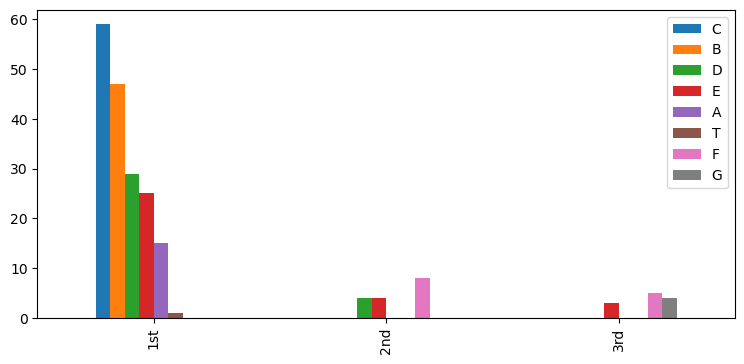

In [488]:
# Correlation with Alphabet and Class information
class_list=[]
for i in range(1,4):
    a = train_df[train_df['Pclass'] == i]['Cabin'].value_counts()
    class_list.append(a)

df = pd.DataFrame(class_list)
df.index = ['1st', '2nd', '3rd']
df.plot(kind="bar", figsize=(9,4))

In [489]:
# 'Age' Feature preprocessing
for dataset in combine:
    dataset['Age'].fillna(dataset.groupby("Title")["Age"].transform("median"), inplace=True)

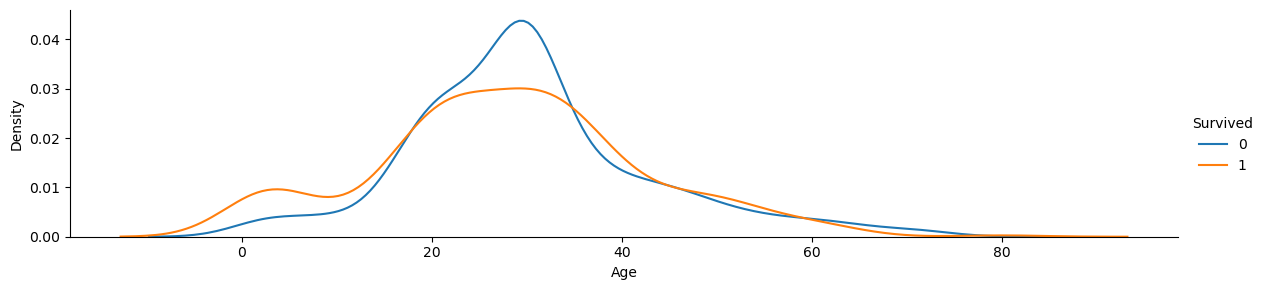

In [490]:
# Visualization about Surveved per Age
g = sns.FacetGrid(train_df, hue="Survived", aspect=4)
g = (g.map(sns.kdeplot, "Age").add_legend())

In [491]:
# Divided by five sub-group ages
for dataset in combine:
    dataset['Agebin'] = pd.cut(dataset['Age'], 5, labels=[0,1,2,3,4])

In [492]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,1.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,2,0,3.0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,2.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,0,2,0,3.0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,1.0,2


In [493]:
# 'Fare' feature preprocessing start
for dataset in combine:
    dataset["Fare"].fillna(dataset.groupby("Pclass")["Fare"].transform("median"), inplace=True)

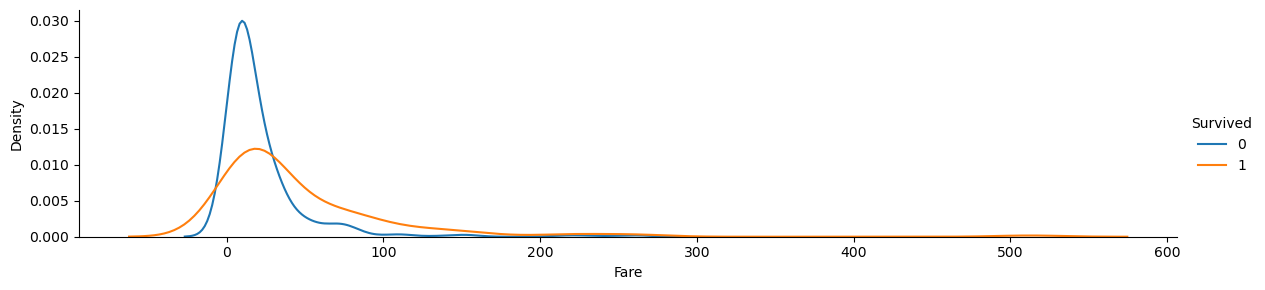

In [494]:
# Visualization about Surveved per Fare
g = sns.FacetGrid(train_df, hue="Survived", aspect=4)
g = (g.map(sns.kdeplot, "Fare").add_legend())

In [495]:
# Divided by four subset for 'Fare'
for dataset in combine:
    dataset['Farebin'] = pd.qcut(dataset['Fare'], 4, labels=[0,1,2,3])    

pd.qcut(test_df['Fare'], 4)

0        (-0.001, 7.896]
1        (-0.001, 7.896]
2        (7.896, 14.454]
3        (7.896, 14.454]
4        (7.896, 14.454]
             ...        
413      (7.896, 14.454]
414    (31.472, 512.329]
415      (-0.001, 7.896]
416      (7.896, 14.454]
417     (14.454, 31.472]
Name: Fare, Length: 418, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.472] < (31.472, 512.329]]

In [496]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Agebin,Farebin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,1.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,2,0,3.0,2,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,2.0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,0,2,0,3.0,2,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,1.0,2,1


In [497]:
# Delete column which are not using training process
drop_column = ['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']
               
for dataset in combine:
               dataset = dataset.drop(drop_column, axis=1, inplace=True)

In [498]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,FamilySize,IsAlone,Title,Agebin,Farebin
0,1,0,3,0,0,2,0,1.0,1,0
1,2,1,1,1,1,2,0,3.0,2,3
2,3,1,3,1,0,1,1,2.0,1,1
3,4,1,1,1,0,2,0,3.0,2,3
4,5,0,3,0,0,1,1,1.0,2,1


In [499]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   Embarked     891 non-null    int64   
 5   FamilySize   891 non-null    int64   
 6   IsAlone      891 non-null    int64   
 7   Title        891 non-null    float64 
 8   Agebin       891 non-null    category
 9   Farebin      891 non-null    category
dtypes: category(2), float64(1), int64(7)
memory usage: 58.0 KB


In [500]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Embarked     418 non-null    int64   
 4   FamilySize   418 non-null    int64   
 5   IsAlone      418 non-null    int64   
 6   Title        418 non-null    float64 
 7   Agebin       418 non-null    category
 8   Farebin      418 non-null    category
dtypes: category(2), float64(1), int64(6)
memory usage: 24.2 KB


In [636]:
# Drop the 'PassengerID' & ' Survived' which are not necessary for the training
drop_column2 = ['PassengerId', 'Survived']
train_data = train_df.drop(drop_column2, axis=1)
target = train_df['Survived']
X_test = test_df

In [609]:
train_data.head()

,Pclass,Sex,Embarked,FamilySize,IsAlone,Title,Agebin,Farebin
0,3,0,0,2,0,1.0,1,0
1,1,1,1,2,0,3.0,2,3
2,3,1,0,1,1,2.0,1,1
3,1,1,0,2,0,3.0,2,3
4,3,0,0,1,1,1.0,2,1


In [503]:
print(train_data.shape)
print(target.shape)
print(X_test.shape)

(891, 8)
(891,)
(418, 9)


In [511]:
# Decision Tree result
clf = DecisionTreeClassifier()
clf.fit(train_data, target)
clf.score(train_data, target)

0.8900112233445566

In [549]:
# Randomforest result
rf_clf = RandomForestClassifier()
rf_clf.fit(train_data, target)
rf_clf.score(train_data, target)

0.8900112233445566

Best Parameter: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 11, 'random_state': 0}
Training Best Score: 0.930486111111111


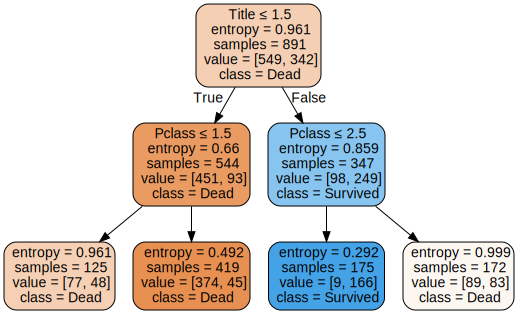

In [547]:
# Fine-tune a Decision Tree using Randomized SearchCV
# Define parameters
param_dist = {'criterion': ['gini', 'entropy'],
             'max_depth': randint(1,25),
             'min_samples_split': randint(2,15),
             'min_samples_leaf': randint(1,15),
             'random_state': [0]
             }

# Decision tree processing
dtree = DecisionTreeClassifier()

# Create randomized search object and fitting
clf = RandomizedSearchCV(dtree, param_distributions=param_dist, n_iter=100, cv=10, scoring='precision', random_state=0)
clf.fit(train_data, target)

print("Best Parameter: {}".format(clf.best_params_))
print("Training Best Score: {}".format(clf.best_score_))

# Ploting Decision Tree
DT_Plot = export_graphviz(clf.best_estimator_, out_file=None, 
                          feature_names=train_data.columns,  
                          class_names=['Dead', 'Survived'],  
                          filled=True, rounded=True,  
                          special_characters=True)
show_graph = graphviz.Source(DT_Plot)
show_graph.render('DT_fine_tune')
show_graph

In [649]:
# Five-fold Cross Validation of Fine-tuned DT model with extract average classification accuracy
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2, random_state=42)

# DT definition with Hyperparameter
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=8, min_samples_split=11, max_depth=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Apply the Five-fold Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(clf, train_data, target, cv=5, scoring="accuracy")
print("Cross Validation Score: {}".format(scores))
print("Average of Cross Validation Score: {}".format(scores.mean()))
print("Standard Deviation: {}".format(scores.std()))

Cross Validation Score: [0.76536313 0.80337079 0.80898876 0.7752809  0.78651685]
Average of Cross Validation Score: 0.7879040863724813
Standard Deviation: 0.016450814596838316


In [650]:
# Five-fold Cross Validation of Fine-tuned RF model with extract average classification accuracy
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2, random_state=42)

# RF definition with Hyperparameter
clf = RandomForestClassifier(criterion='entropy', min_samples_leaf=3, min_samples_split=16, max_features=3, max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Apply the Five-fold Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(clf, train_data, target, cv=5, scoring="accuracy")
print("Cross Validation Score: {}".format(scores))
print("Average of Cross Validation Score: {}".format(scores.mean()))
print("Standard Deviation: {}".format(scores.std()))

Cross Validation Score: [0.83798883 0.82022472 0.8258427  0.80337079 0.85955056]
Average of Cross Validation Score: 0.8293955181721173
Standard Deviation: 0.01874664964067763
